In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df_tr = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

In [3]:
def print_dataset_analysis(train_dataset, n_top=5):
    print("📊 Basic Overview of Data")
    print(train_dataset.head(n_top))
    
    print("\n🔍 Data Summary")
    print(train_dataset.describe())

    print("\n🚫 Null Values in Data")
    train_null_count = train_dataset.isnull().sum()
    if train_null_count.sum() == 0:
        print("No null values in the dataset.")
    else:
        print("Null Values:")
        print(train_null_count[train_null_count > 0])

    print("\n♻️ Duplicate Values in Data")
    train_duplicates = train_dataset.duplicated().sum()
    print(f"{train_duplicates} duplicate rows found.")

    print("\n📏 Data Shape")
    print(f"Rows: {train_dataset.shape[0]}, Columns: {train_dataset.shape[1]}")

def print_unique_values(train_dataset):
    print("\n🔢 Unique Values in Data")
    unique_values_table = pd.DataFrame({
        'Column Name': train_dataset.columns,
        'Data Type': [train_dataset[col].dtype for col in train_dataset.columns],
        'Unique Values': [', '.join(map(str, train_dataset[col].unique()[:7])) for col in train_dataset.columns]
    })
    print(unique_values_table)

print_dataset_analysis(df_tr, n_top=5)
print_unique_values(df_tr)

📊 Basic Overview of Data
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V

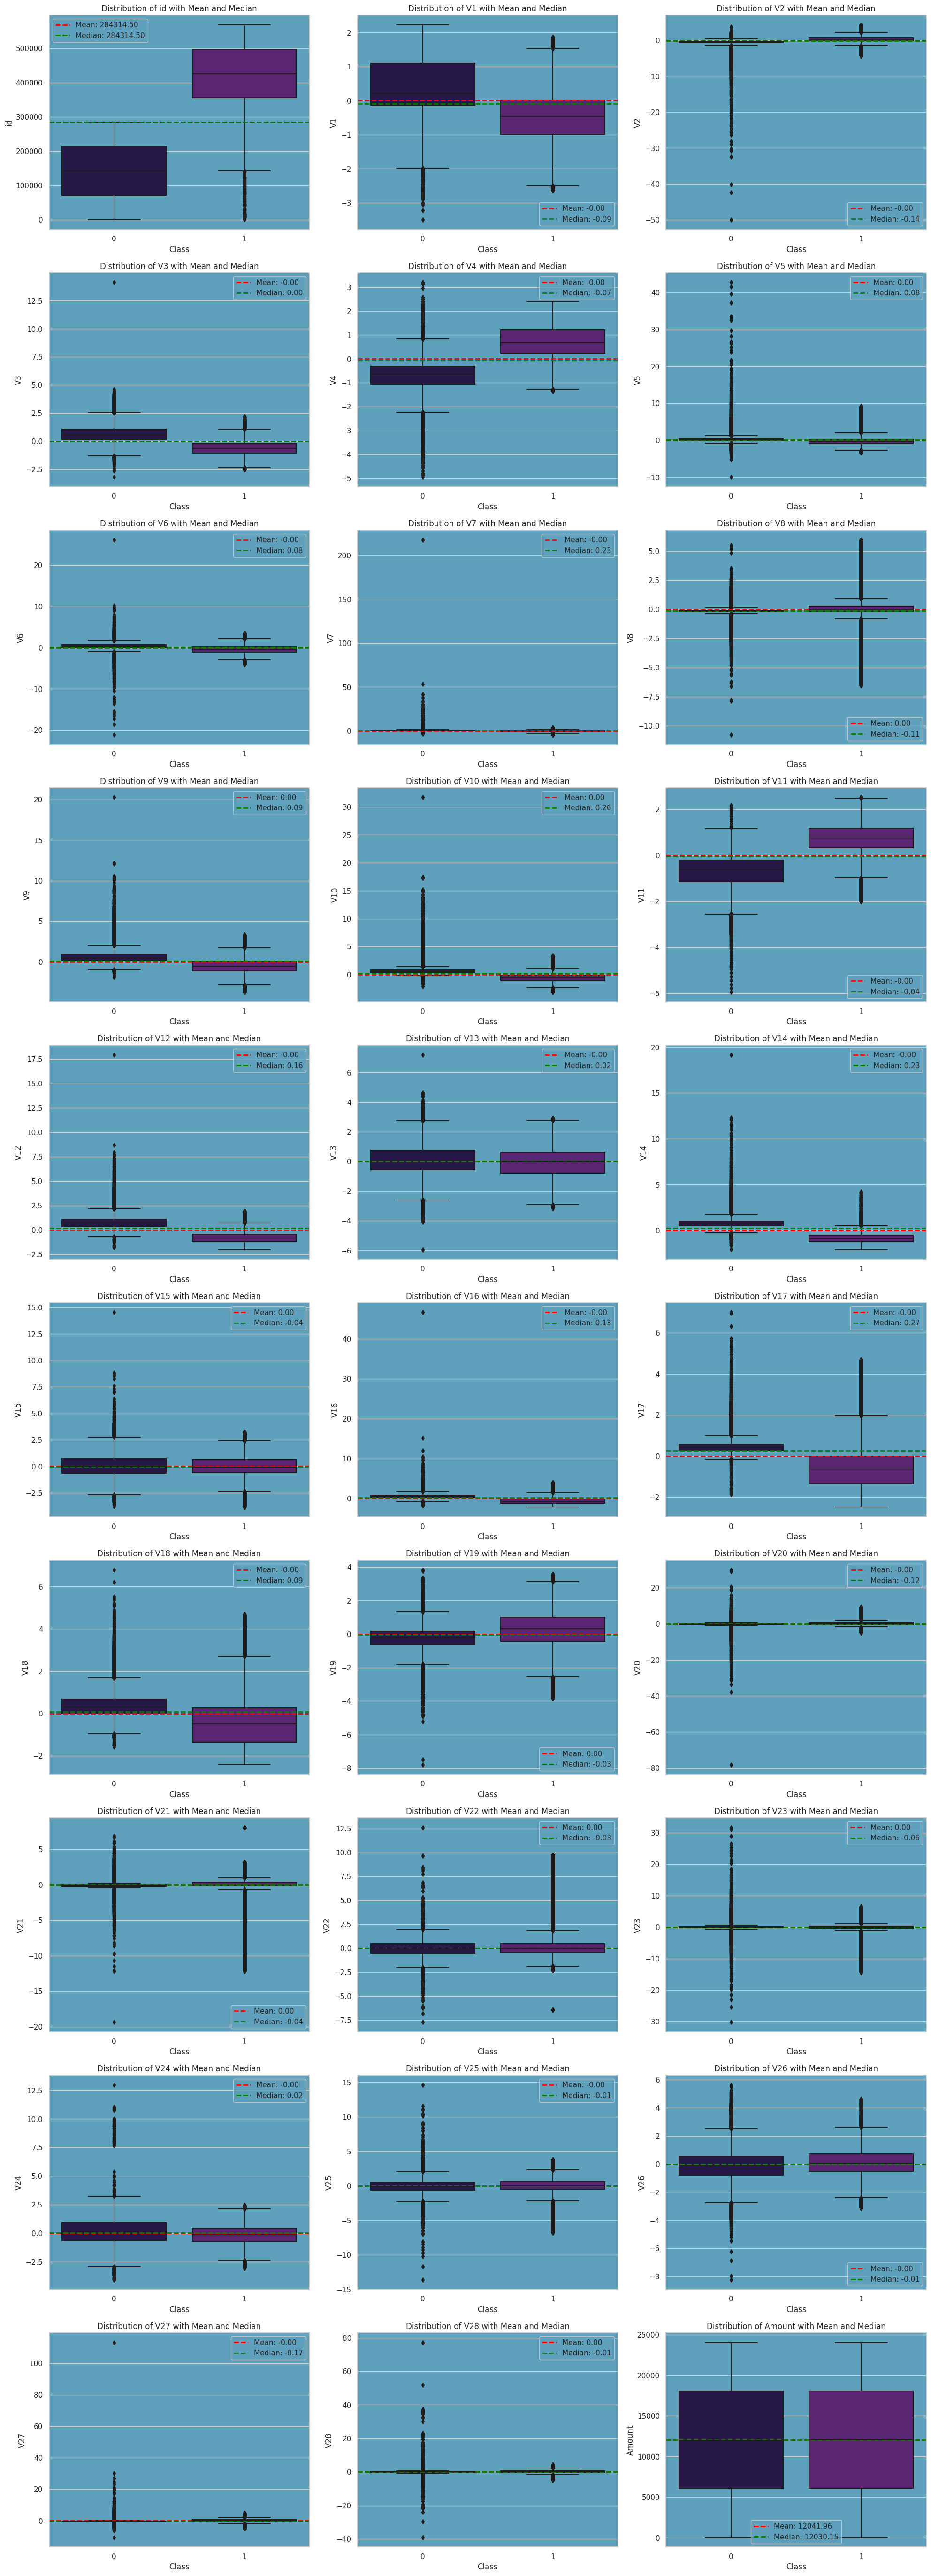

In [5]:
def create_boxplot_subplots(df, columns, hue, theme_style, theme_rc, palette, figsize=(15, 10)):
    sns.set_theme(style=theme_style, rc=theme_rc)
    
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize)
    axes = axes.flatten()
    
    plot_index = 0
    for col in columns:
        if col == hue:  # Skip the hue column itself
            continue

        sns.boxplot(data=df, x=hue, y=col, palette=palette, ax=axes[plot_index])
        
        mean_value = df[col].mean()
        median_value = df[col].median()
        
        axes[plot_index].axhline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        axes[plot_index].axhline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
        
        axes[plot_index].set_title(f'Distribution of {col} with Mean and Median')
        axes[plot_index].set_xlabel(hue)
        axes[plot_index].set_ylabel(col)
        axes[plot_index].legend()
        
        plot_index += 1
    
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

columns = df_tr.columns.to_list() 
palette = sns.color_palette("magma") 

create_boxplot_subplots(df=df_tr, columns=columns, hue='Class', 
                        theme_style='whitegrid', theme_rc={"axes.facecolor": "#5fa1bc"}, 
                        palette=palette, figsize=(20, 60))


In [6]:
X = df_tr.drop('Class', axis=1)
y = df_tr['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9998241387193781

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

